# Decision trees and overfitting
### We will delve into the operation of data trees using a composite set.

### Suppose we have an experiment where we are measuring the relationship between two variables.

* We know that the real relation is `y = x`.

* But in an experiment there is always a noise, so our measurements will be `y = x + random`.

* Suppose we have 100 observations for `x', from -0.5 to +0.5.

In [1]:
import numpy as np

x = np.linspace(-.5, .5, 100)

* scikit-learn wants the data to be of the form `n_samples`, `n_features`.

* Here we have n_features = 1.

* So we have to put each observation `x` in a separate array.

In [2]:
xs = x.reshape(x.shape[0], 1)
print(xs[:10])

[[-0.5       ]
 [-0.48989899]
 [-0.47979798]
 [-0.46969697]
 [-0.45959596]
 [-0.44949495]
 [-0.43939394]
 [-0.42929293]
 [-0.41919192]
 [-0.40909091]]


* Θα παράξουμε τις τιμές `y`.

* Θυμηθείτε, πρόκειται για *συνθετικά* δεδομένα.

In [3]:
np.random.seed(1)
y = x + np.random.normal(loc=0, scale=0.1, size=x.shape[0])
print(y[:10])

[-0.33756546 -0.55107463 -0.53261516 -0.57699383 -0.3730552  -0.67964882
 -0.26491276 -0.50541362 -0.38728801 -0.43402795]


* We will generate the `y` values.

* Remember, this is *synthetic* data.

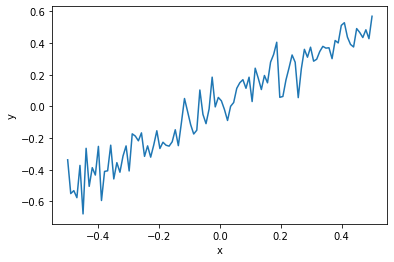

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(x, y)
plt.xlabel('x')
_ = plt.ylabel('y')

* We will generate the `y` values.

* Remember, this is *synthetic* data.

In [5]:
from sklearn.tree import DecisionTreeRegressor

simple_tree = DecisionTreeRegressor(max_depth=1)
simple_tree.fit(xs, y)

DecisionTreeRegressor(max_depth=1)

* Depth one means that in essence the tree will choose an `x' value that will split the data into two.

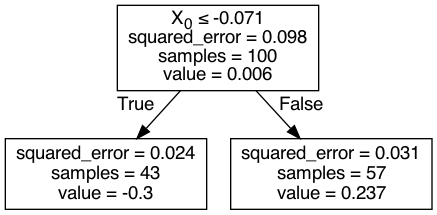

In [6]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image  


dot_data = StringIO()  
tree.export_graphviz(simple_tree, out_file=dot_data,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

* The predicted value for each subset is shown in the `value` field of each node.

* We can visualize the results of the tree, based on the prediction for each possible value of `x`.

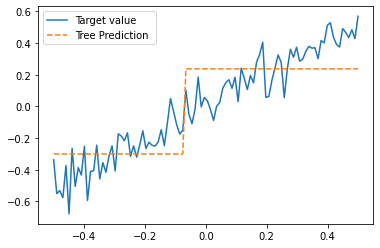

In [7]:
y_pred  = simple_tree.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
_ = plt.legend()

* We see that we got a step function.

* To see what we get if we increase the depth of the tree.

* We will make a new `DecisionTreeRegressor` with `max_depth` equal to two.

In [8]:
simple_tree_2 = DecisionTreeRegressor(max_depth=2)
simple_tree_2.fit(xs, y)

DecisionTreeRegressor(max_depth=2)

* Now let's look at the tree we got.

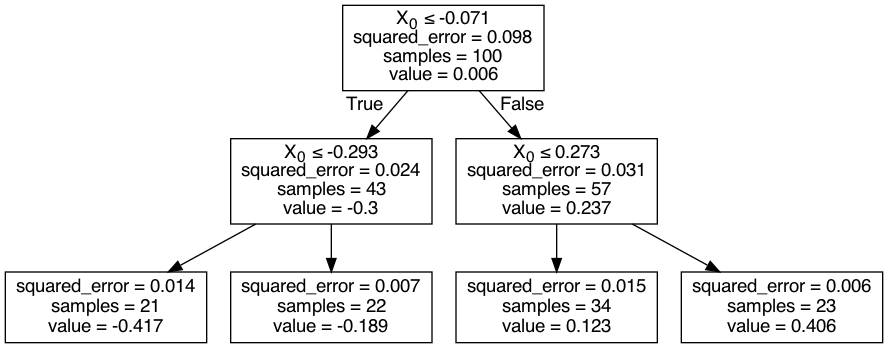

In [9]:
dot_data = StringIO()  
tree.export_graphviz(simple_tree_2, out_file=dot_data,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

* We can again plot the predictions against our data.

* We find that the predictions follow our data more closely.

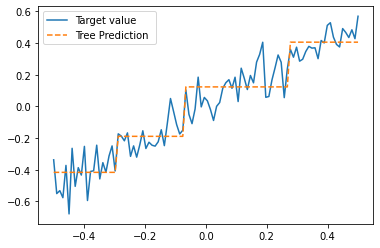

In [10]:
y_pred  = simple_tree_2.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
plt.legend()

* Is there a limit to the number of tree levels?

* We can search for the ideal value for the `max_depth` hyperparameter.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(xs, y)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


* Let's put the search results into a `DataFrame`.

In [12]:
import pandas as pd

cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000797,0.000250,0.000569,0.000117,1,{'max_depth': 1},0.607495,0.765537,0.681682,0.654618,0.641178,0.670102,0.053363,10
1,0.000683,0.000194,0.000590,0.000195,2,{'max_depth': 2},0.821585,0.932724,0.806193,0.860453,0.817589,0.847709,0.046267,3
2,0.000620,0.000223,0.000575,0.000238,3,{'max_depth': 3},0.896470,0.949902,0.760825,0.890455,0.911057,0.881742,0.063904,1
3,0.000652,0.000174,0.000540,0.000086,4,{'max_depth': 4},0.871805,0.941957,0.753673,0.872550,0.911136,0.870224,0.063893,2
4,0.000634,0.000128,0.000507,0.000117,5,{'max_depth': 5},0.830653,0.914181,0.630490,0.881906,0.872913,0.826029,0.101339,5
5,0.000526,0.000071,0.000479,0.000151,6,{'max_depth': 6},0.830001,0.920180,0.640499,0.861733,0.889995,0.828481,0.098629,4
6,0.000665,0.000162,0.000565,0.000104,7,{'max_depth': 7},0.828934,0.910372,0.629398,0.868159,0.881861,0.823745,0.100650,9
7,0.000483,0.000093,0.000405,0.000074,8,{'max_depth': 8},0.843294,0.907984,0.622945,0.863543,0.884362,0.824426,0.103010,7
8,0.000473,0.000052,0.000380,0.000008,9,{'max_depth': 9},0.837801,0.906764,0.622945,0.863176,0.890661,0.824269,0.103384,8
9,0.000457,0.000043,0.000368,0.000015,10,{'max_depth': 10},0.843992,0.907173,0.622945,0.864144,0.890486,0.825748,0.103689,6


* Performance is measured by the $R^2$ factor.

* Best performance is 1.0 and worst can be negative (unlike linear regression).

* A model that always predicts the mean value of `y` will have a performance of 0.

* Diagrammatically we can see that the performance improves up to depth three, and then starts to decrease.

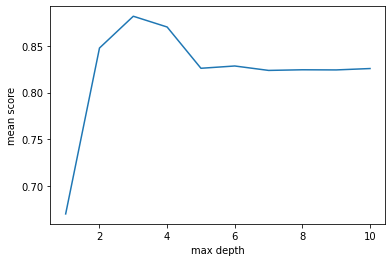

In [13]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'], label='True y')
plt.xlabel('max depth')
_ = plt.ylabel('mean score')

* For this deep three, the predictions are as follows:

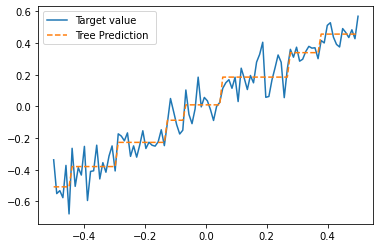

In [14]:
simple_tree_3 = DecisionTreeRegressor(max_depth=3)
simple_tree_3.fit(xs, y)
y_pred  = simple_tree_3.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
_ = plt.legend()

* What is the problem with larger depth values?

* For example, what about `max_depth=10`?

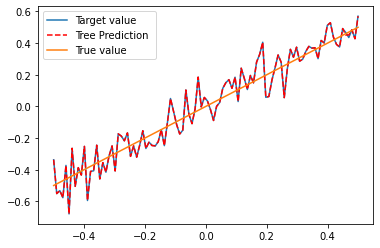

In [15]:
simple_tree_10 = DecisionTreeRegressor(max_depth=10)
simple_tree_10.fit(xs, y)
y_pred  = simple_tree_10.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--', color='r')
plt.plot(x, x, label='True value')
_ = plt.legend()

* What happens is that our model *exactly copied* the data!

* It almost perfectly predicts the values ​​of the data we have.

In [16]:
y - y_pred

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00285114, -0.00285114,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

* But, if we think about it, we have made a huge tree.

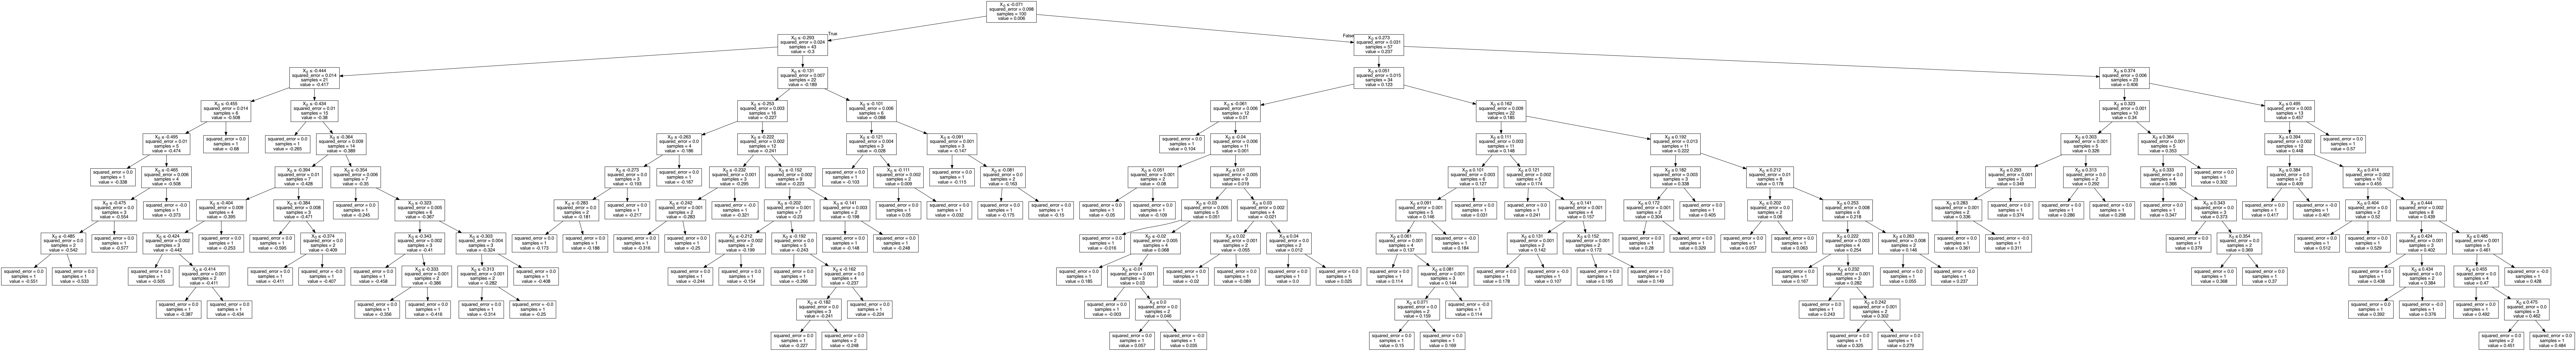

In [17]:
dot_data = StringIO()  
tree.export_graphviz(simple_tree_10, out_file=dot_data,
                     special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())  

In [18]:
print(tree.export_text(simple_tree_10))

|--- feature_0 <= -0.07
|   |--- feature_0 <= -0.29
|   |   |--- feature_0 <= -0.44
|   |   |   |--- feature_0 <= -0.45
|   |   |   |   |--- feature_0 <= -0.49
|   |   |   |   |   |--- value: [-0.34]
|   |   |   |   |--- feature_0 >  -0.49
|   |   |   |   |   |--- feature_0 <= -0.46
|   |   |   |   |   |   |--- feature_0 <= -0.47
|   |   |   |   |   |   |   |--- feature_0 <= -0.48
|   |   |   |   |   |   |   |   |--- value: [-0.55]
|   |   |   |   |   |   |   |--- feature_0 >  -0.48
|   |   |   |   |   |   |   |   |--- value: [-0.53]
|   |   |   |   |   |   |--- feature_0 >  -0.47
|   |   |   |   |   |   |   |--- value: [-0.58]
|   |   |   |   |   |--- feature_0 >  -0.46
|   |   |   |   |   |   |--- value: [-0.37]
|   |   |   |--- feature_0 >  -0.45
|   |   |   |   |--- value: [-0.68]
|   |   |--- feature_0 >  -0.44
|   |   |   |--- feature_0 <= -0.43
|   |   |   |   |--- value: [-0.26]
|   |   |   |--- feature_0 >  -0.43
|   |   |   |   |--- feature_0 <= -0.36
|   |   |   |   |   |---

* But, if we think about it, we have made a huge tree.

In [19]:
simple_tree_10.get_n_leaves()

98

* But remember that the real relationship we would like to find is the relationship `y = x`.

* So we can see how trees of different depth predict the *real* data.

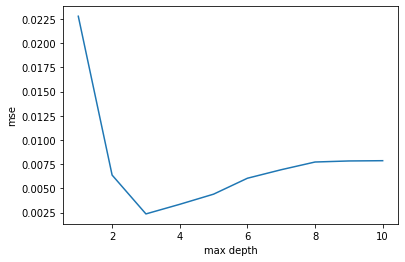

In [20]:
from sklearn.metrics import mean_squared_error

all_depths = []
all_mses = []
y_true = x

for max_depth in range(1, 11):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    simple_tree.fit(xs, y)
    y_pred  = simple_tree.predict(xs)
    mse = mean_squared_error(y_true, y_pred)
    all_mses.append(np.mean(mse))
    
plt.plot(all_depths, all_mses, label='True y')
plt.xlabel('max depth')
_ = plt.ylabel('mse')

* We are witnessing the phenomenon of *overfitting* (overfitting).

* Overfitting is, unfortunately, the evil curse that always haunts us in Machine Learning.

* There is no simple solution to avoid underfitting.

* Good validation of our data is always needed.

* We must always check that the training data matches the data the system will find in production.

* The model must not be more complicated (powerful) than the nature and data of the problem dictate.